# Analysis with the OTUs table

Merging OTU day and night samples

In [1]:
import pandas as pd

otu_table_taxonomy_df = pd.read_table('/media/renato/SSD1TB/Projects/UGA_RACS/16S/Workflow/2_QiimeOtus/2f_otu_table.sample_filtered.no_mitochondria_chloroplast_taxonomy.tsv',
                                      comment='#', dtype = {'OTU': str})
#otu_table_taxonomy_df = pd.read_table('/media/rsantos/4TB_drive/Projects/UGA_RACS/16S/Workflow/2_QiimeOtus/2f_otu_table.sample_filtered.no_mitochondria_chloroplast_taxonomy.tsv',
#                                      comment='#', dtype = {'OTU': str})

otu_table_taxonomy_df.set_index('OTU', inplace=True)
otu_table_taxonomy_df.drop('taxonomy', axis=1, inplace=True)
otu_table_taxonomy_df.head()

,LMAN.8.14A0051,LMAN.8.14A0304,LMAD.8.14A0247,LMAN.8.14A0159,LMAD.8.14A0051,LMAD.26.14A0381,LMAD.26.14A0533,LMAD.8.14A0281,LMAD.8.14A0295,LMAN.26.14A0319,...,LMAN.26.14A0303,LMAN.8.14A0011,LMAD.26.14A0137,LMAN.26.14A0327,LMAN.8.14A0205,LMAD.8.14A0265,LMAD.26.14A0155,LMAD.26.14A0167,LMAD.26.14A0481,LMAN.26.14A0329
OTU,,,,,,,,,,,,,,,,,,,,,
4479944,1.0,2.0,1.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1124709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533625,1.0,36.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
otu_genotype_day_day_dict = {}
otu_genotype_day_night_dict = {}

sample_dict = {}

for sample in otu_table_taxonomy_df.columns:
    plot = sample.split('.')[2]
    day = str(sample.split('.')[1])
    day_period = sample.split('.')[0].replace('LMA', '')
    if plot+"_"+day in sample_dict.keys():
        sample_dict[plot+"_"+day]+=1
    else:
        sample_dict[plot+"_"+day]=1
    if day_period == 'D':
        otu_genotype_day_day_dict[sample] = plot+"_"+day
    elif day_period == 'N':
        otu_genotype_day_night_dict[sample] = plot+"_"+day
    else:
        print('Error: ', sample)
        exit(1)

day_night_samples = []
day_or_night_sample = []
more_samples = []

for key in sample_dict.keys():
    if sample_dict[key] == 1:
        day_or_night_sample.append(key)
    elif sample_dict[key] == 2:
        day_night_samples.append(key)
    elif sample_dict[key] > 2:
        more_samples.append(key)
    else:
        print('Error: ', key)
        exit(1)

print(f'There are {len(day_or_night_sample)} cases that one sample is available for plot.')
print(f'There are {len(day_night_samples)} cases that day and night samples are available.')
print(f'There are {len(more_samples)} cases that day and night samples are available.')

There are 42 cases that one sample is available for plot.
There are 249 cases that day and night samples are available.
There are 0 cases that day and night samples are available.


#### Separating day from night samples into two different matrices

In [3]:
otu_table_day_cols = otu_table_taxonomy_df.loc[:, list(otu_genotype_day_day_dict.keys())]
otu_table_night_cols = otu_table_taxonomy_df.loc[:, list(otu_genotype_day_night_dict.keys())]

In [4]:
print(otu_table_day_cols.shape)
print(otu_table_night_cols.shape)

(9057, 260)
(9057, 280)


In [5]:
otu_table_night_cols.head()

,LMAN.8.14A0051,LMAN.8.14A0304,LMAN.8.14A0159,LMAN.26.14A0319,LMAN.26.14A0341,LMAN.8.14A0119,LMAN.8.14A0135,LMAN.26.14A0465,LMAN.8.14A0343,LMAN.26.14A0169,...,LMAN.8.14A0197,LMAN.8.14A0247,LMAN.26.14A0211,LMAN.8.14A0339,LMAN.26.14A0093,LMAN.26.14A0303,LMAN.8.14A0011,LMAN.26.14A0327,LMAN.8.14A0205,LMAN.26.14A0329
OTU,,,,,,,,,,,,,,,,,,,,,
4479944,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995900,0.0,1.0,0.0,15.0,2.0,5.0,3.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1124709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533625,1.0,36.0,0.0,12.0,2.0,56.0,0.0,42.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Renaming the columns from runs to "day_plot"

In [6]:
otu_table_day_cols = otu_table_day_cols.rename(columns=otu_genotype_day_day_dict)
otu_table_night_cols = otu_table_night_cols.rename(columns=otu_genotype_day_night_dict)

In [7]:
otu_table_day_cols.head()

,14A0247_8,14A0051_8,14A0381_26,14A0533_26,14A0281_8,14A0295_8,14A0169_26,14A0069_8,14A0497_26,14A0023_8,...,14A0345_8,14A0267_8,14A0009_8,14A0007_8,14A0093_26,14A0137_26,14A0265_8,14A0155_26,14A0167_26,14A0481_26
OTU,,,,,,,,,,,,,,,,,,,,,
4479944,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995900,0.0,0.0,0.0,0.0,5.0,8.0,5.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1124709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533625,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
otu_table_night_cols.head()

,14A0051_8,14A0304_8,14A0159_8,14A0319_26,14A0341_26,14A0119_8,14A0135_8,14A0465_26,14A0343_8,14A0169_26,...,14A0197_8,14A0247_8,14A0211_26,14A0339_8,14A0093_26,14A0303_26,14A0011_8,14A0327_26,14A0205_8,14A0329_26
OTU,,,,,,,,,,,,,,,,,,,,,
4479944,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995900,0.0,1.0,0.0,15.0,2.0,5.0,3.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1124709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
533625,1.0,36.0,0.0,12.0,2.0,56.0,0.0,42.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



#### Filter columns that are present in day and night period matrices based on "day_plot" association

In [8]:
otu_table_day_cols_filtered = otu_table_day_cols.filter(items=otu_table_night_cols.columns)
otu_table_night_cols_filtered = otu_table_night_cols.filter(items=otu_table_day_cols.columns)

In [9]:
print(otu_table_day_cols.shape)
print(otu_table_night_cols.shape)

print(otu_table_day_cols_filtered.shape)
print(otu_table_night_cols_filtered.shape)

(9057, 260)
(9057, 280)
(9057, 249)
(9057, 249)


In [10]:
otu_table_day_cols_filtered = otu_table_day_cols_filtered.reindex(columns=otu_table_night_cols_filtered.columns)

In [11]:
if otu_table_day_cols_filtered.columns.all == otu_table_night_cols_filtered.columns.all:
    print('Columns are equal!')

Columns are equal!


In [12]:
if list(otu_table_day_cols_filtered.index) == list(otu_table_night_cols_filtered.index):
    print('Indices are equal!')

Indices are equal!


In [13]:
otu_table_cols_filtered_corr = otu_table_day_cols_filtered.corrwith(otu_table_night_cols_filtered, axis = 0)

<Axes: >

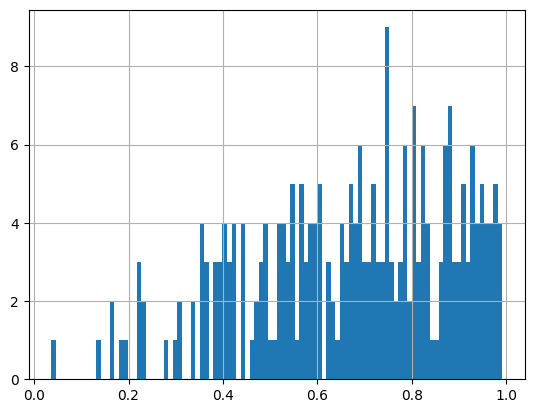

In [14]:
otu_table_cols_filtered_corr.hist(bins=100)

#### Generating a OTU table with merge day and night samples

Summing OTU counts of the two dataframes (day and night).

This is only the matrix with cases where both day and night are present.

In [15]:
sum_otu_filtered_df = otu_table_day_cols_filtered.add(otu_table_night_cols_filtered)

sum_otu_filtered_df.head(n=2)

,14A0247_8,14A0051_8,14A0381_26,14A0533_26,14A0281_8,14A0295_8,14A0169_26,14A0069_8,14A0497_26,14A0023_8,...,14A0345_8,14A0267_8,14A0009_8,14A0007_8,14A0093_26,14A0137_26,14A0265_8,14A0155_26,14A0167_26,14A0481_26
OTU,,,,,,,,,,,,,,,,,,,,,
4479944,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995900,0.0,0.0,0.0,0.0,5.0,8.0,6.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
sum_otu_filtered_df.to_csv('summed_day_night_otu_counts.tsv', sep='\t', index=True)